# ALL PLOTS

#### This jupyter notebook aims to provide the pattern to the images that will be put in the soon-to-be-summited paper

### Packages

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import arviz             as az
import os
from mpl_toolkits.mplot3d import Axes3D

### Plot parameters for this Jupyter Notebook

In [2]:
plotpars = {'axes.linewidth': 1.,
            'axes.labelsize': 18,
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
            'legend.framealpha': 0.6,
            'legend.loc': 'upper right',
            'legend.fontsize': 12,
           }

In [3]:
palette = np.array(['#8c510a','#bf812d','#80cdc1','#35978f','#01665e'])

### Paths

In [4]:
results_path    = '../../LargeFilesResults/Model'       # where the outputs of this notebook will be saved
figs_paper_path = '../../LargeFilesResults/PaperFigs/'  # where the selected figures should be saved

# Posteriors

In [5]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_rmshared_revised.csv'))

In [6]:
whan_classes = np.array(['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF'])

In [7]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


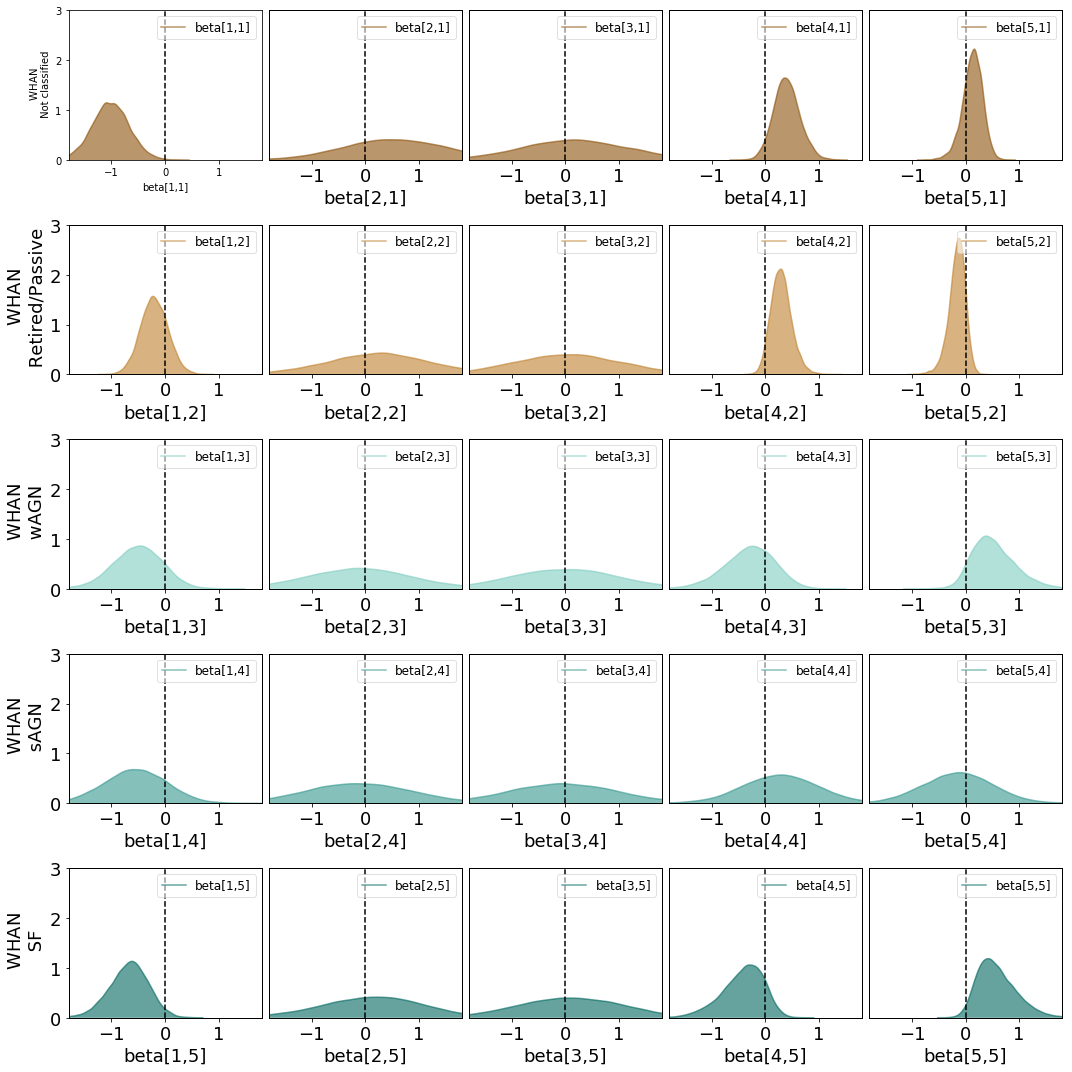

In [8]:
figsize = (15, 15)
alpha   = 0.6

plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.axvline(x=0, linestyle="--", color='black')
        plt.rcParams.update(plotpars)
        plt.legend(loc='upper right')
        plt.xlabel(r"%s" % str(name_temp))
        plt.xlim([-1.8,1.8])
        plt.ylim([0,3.])
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta])       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1
plt.tight_layout(w_pad=0)
plt.savefig(os.path.join(figs_paper_path, '25betas_rmshared_revised.png'), bbox_inch='tight')
plt.savefig(os.path.join(figs_paper_path, '25betas_rmshared_revised.pdf'), bbox_inch='tight')
plt.show()

In [20]:
type(posteriors.keys()[0])

str

In [29]:
posteriors_dictionary = {}
for i in range(posteriors.keys().size):
    posteriors_dictionary['%s' % (posteriors.keys()[i])] = posteriors.values[i]

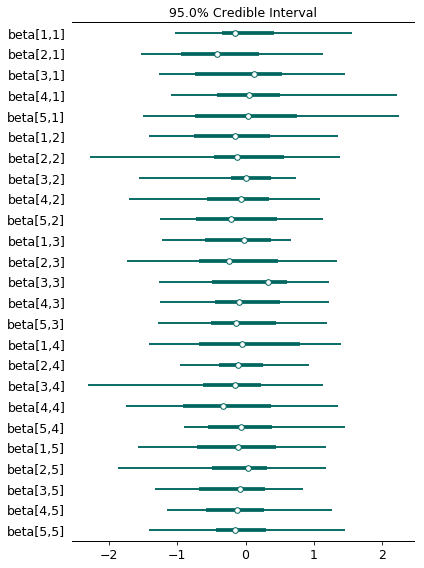

In [106]:
az.plot_forest(data=posteriors_dictionary, var_names=list(posteriors.keys()), figsize=(6,8), r_hat=False, n_eff=False, 
               credible_interval=0.95, quartiles=True, colors=palette[-1])
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, '25betas_forest_rmshared_revised.png'))
plt.savefig(os.path.join(figs_paper_path, '25betas_forest_rmshared_revised.pdf'))
plt.show()

In [78]:
plt.savefig??